0. Cargar las librerias

In [ ]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos- Análisis A-priori

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlación:
                           App Usage Time (min/day)  Battery Drain (mAh/day)  \
App Usage Time (min/day)                  1.000000                 0.956385   
Battery Drain (mAh/day)                   0.956385                 1.000000   
Data Usage (MB/day)                       0.942308                 0.932276   
Age                                       0.004382                -0.002722   
User Behavior Class                       0.970498                 0.978587   

                          Data Usage (MB/day)       Age  User Behavior Class  
App Usage Time (min/day)             0.942308  0.004382             0.970498  
Battery Drain (mAh/day)              0.932276 -0.002722             0.978587  
Data Usage (MB/day)                  1.000000  0.003999             0.946734  
Age                                  0.003999  1.000000            -0.000563  
User Behavior Class                  0.946734 -0.000563             1.000000  
[[ 393 1872 1122

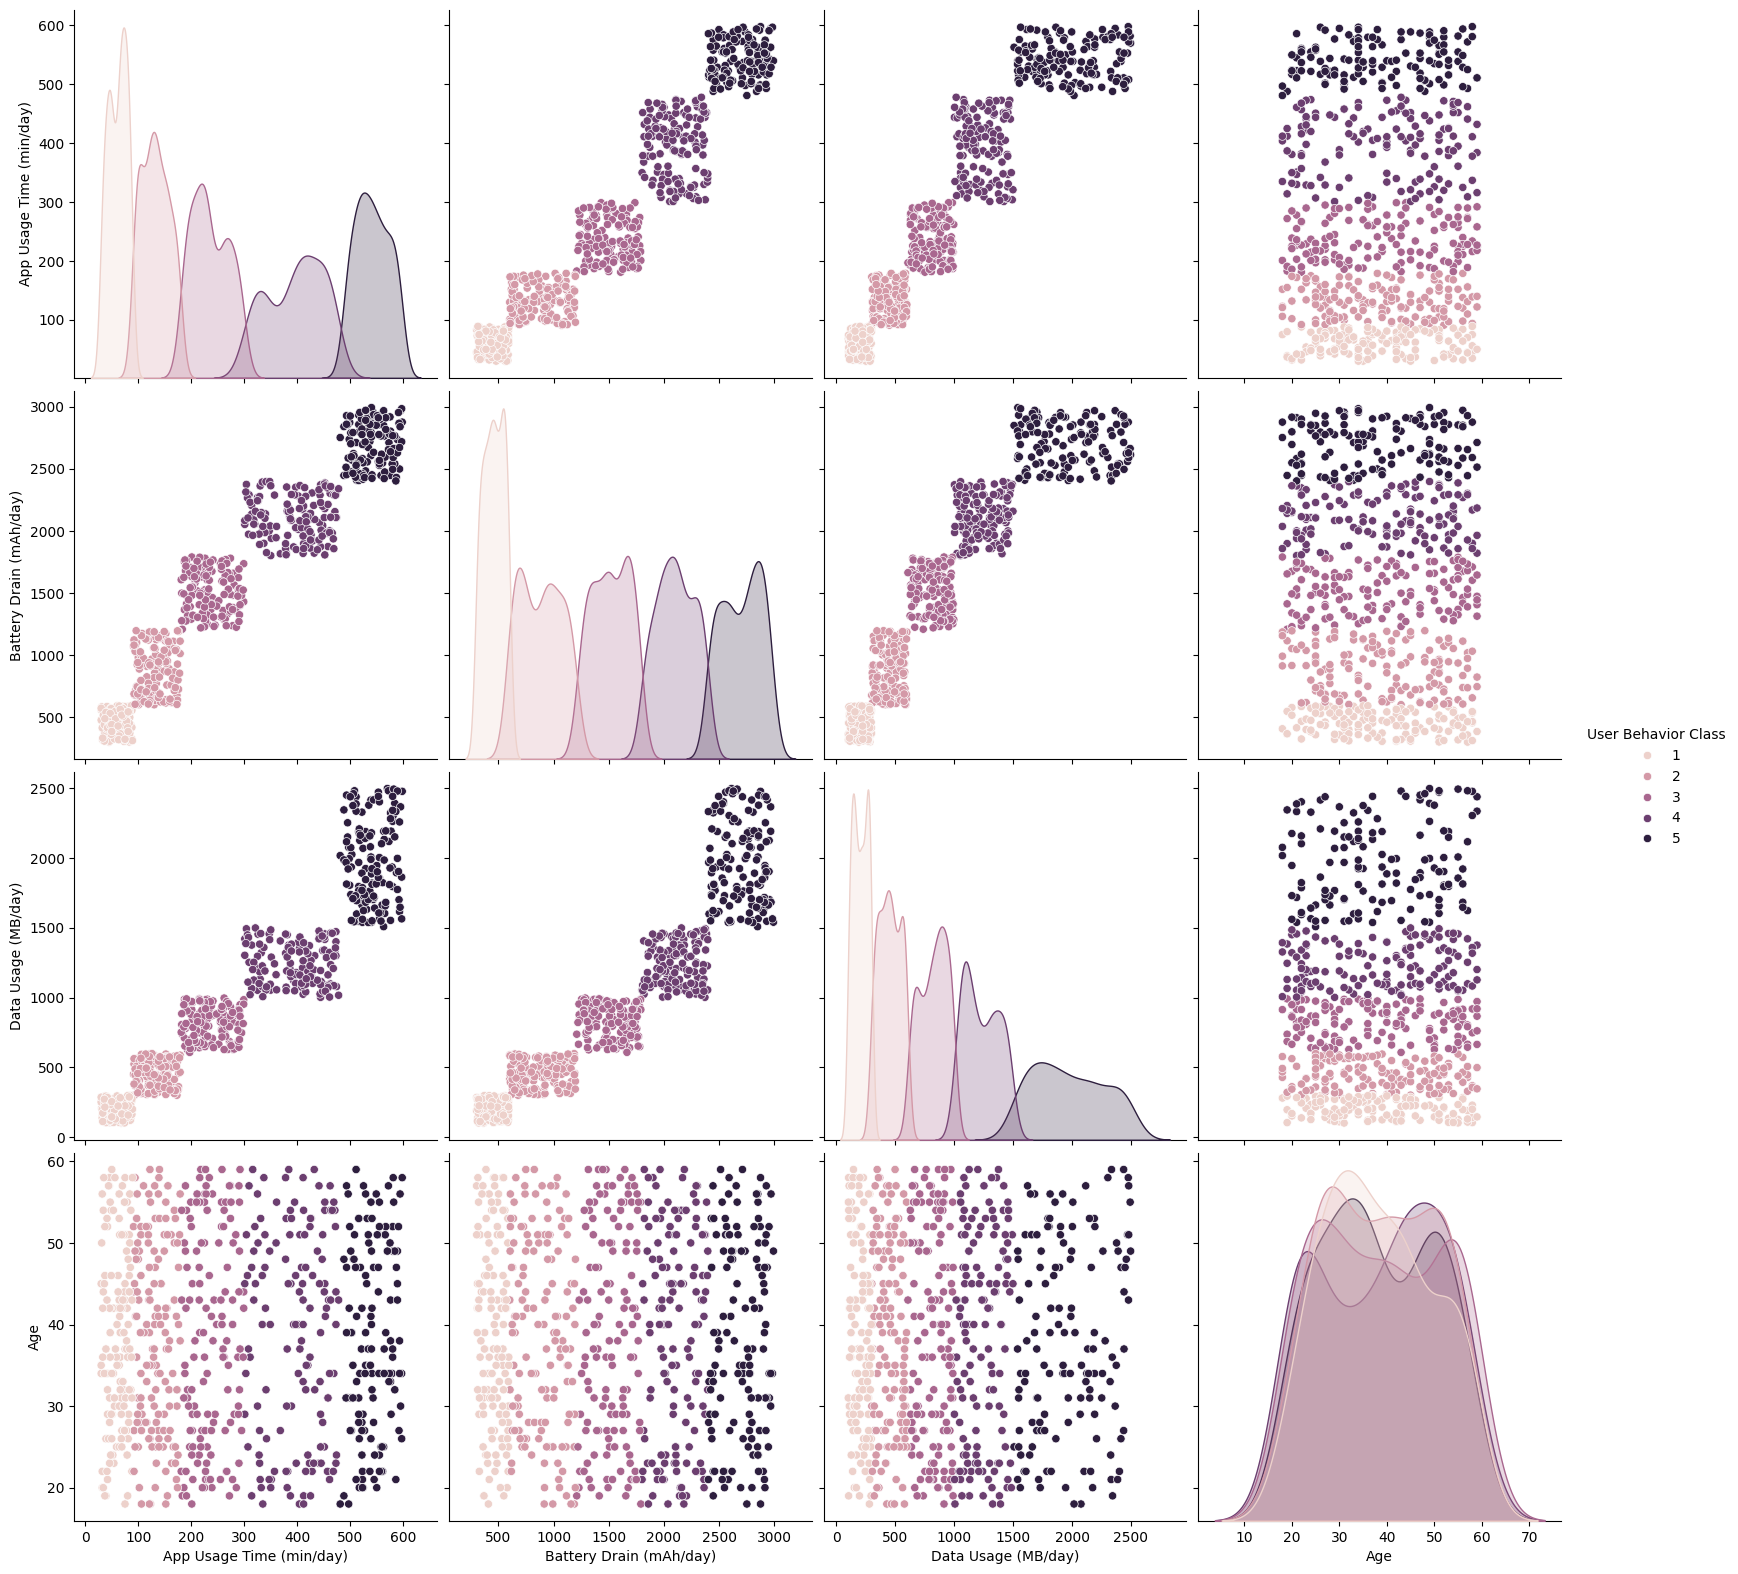

In [ ]:
nxl='/content/drive/MyDrive/Collab María/Base de Datos_Final.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

XDB=XDB[['App Usage Time (min/day)','Battery Drain (mAh/day)','Data Usage (MB/day)','Age','User Behavior Class']]
sns.pairplot(XDB,hue='User Behavior Class', size=4, vars=['App Usage Time (min/day)','Battery Drain (mAh/day)','Data Usage (MB/day)','Age'])

corr=XDB.corr()
print("Esta es la matriz de correlación:\n", corr)

XD=np.array(XDB.iloc[:,0:4])
yd=np.array(XDB.iloc[:,4])

print(XD)
print(yd)

2. Modelo KNN

Esta es la matriz de confusión:
 [[136   0   0   0   0]
 [  0 146   0   0   0]
 [  0   0 143   0   0]
 [  0   0   0 139   0]
 [  0   0   0   0 136]]
La Exactitud Alcanzada por el Modelo es:  1.0
La Sensibilidad Alcanzada por el Modelo es:  1.0
La Especificidad Alcanzada por el Modelo es:  1.0
La clase del comportamiento del usuario:  [3]


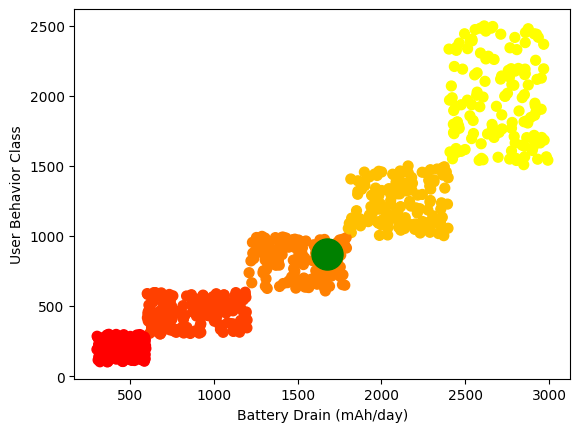

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,yd)

ydp=mknn.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusión:\n",cm)


VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Ex=(VP+VN)/(VN+VP+FN+FP)
print("La Exactitud Alcanzada por el Modelo es: ",Ex)
Sensibilidad=VP/(FN+VP)
print("La Sensibilidad Alcanzada por el Modelo es: ",Sensibilidad)
Especificidad=VN/(VN+FP)
print("La Especificidad Alcanzada por el Modelo es: ",Especificidad)

XDP=np.array([[239, 1676, 871,20]])
ydpp=mknn.predict(XDP)
print("La clase del comportamiento del usuario: ",ydpp)

plt.scatter(XD[:,1], XD[:,2],c=yd,s=50,cmap='autumn')
plt.scatter(XDP[:,1], XDP[:,2], marker='o',s=500,facecolors='green')
plt.xlabel('Battery Drain (mAh/day)'); plt.ylabel('User Behavior Class')
plt.show()



3. Se procede con la construcción de K-MeanShift
(Montoncitos de Datos- Clusters)

Donde quedó el primer usuario 4
Donde quedó el segundo usuario 2
Donde quedó el tercer usuario 3


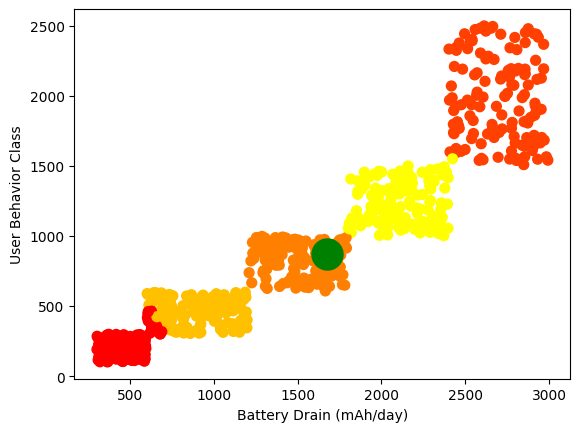

La clase del comportamiento del usuario:  [2]
Las características de cada cluster son:
 [[  68.17532468  476.0974026   222.94805195   38.32467532]
 [ 541.42222222 2703.06666667 1977.91851852   38.22222222]
 [ 235.3986014  1515.05594406  822.01398601   38.67832168]
 [ 132.7109375   918.703125    461.6328125    38.5703125 ]
 [ 396.78571429 2108.07857143 1234.5          38.62857143]]


In [ ]:
np.random.seed(42)

mkm=KMeans(n_clusters=5, init= 'random', random_state=42)
mkm.fit(XD,yd)
labels=mkm.labels_
print("Donde quedó el primer usuario",labels[0,])
print("Donde quedó el segundo usuario",labels[1,])
print("Donde quedó el tercer usuario",labels[2,])

plt.scatter(XD[:,1], XD[:,2],c=labels,s=50,cmap='autumn')
plt.scatter(XDP[:,1], XDP[:,2], marker='o',s=500,facecolors='green')
plt.xlabel('Battery Drain (mAh/day)'); plt.ylabel('User Behavior Class')
plt.show()

XDP=np.array([[239,1676,871,20]])
ydpp2=mkm.predict(XDP)
print("La clase del comportamiento del usuario: ",ydpp2)

c20=len(np.where((labels==0) & (yd==1))[0])
c21=len(np.where((labels==3) & (yd==2))[0])
c22=len(np.where((labels==2) & (yd==3))[0])
c23=len(np.where((labels==4) & (yd==4))[0])
c24=len(np.where((labels==1) & (yd==5))[0])

clusters=mkm.cluster_centers_
print("Las características de cada cluster son:\n",clusters)

4. Otras gráficas

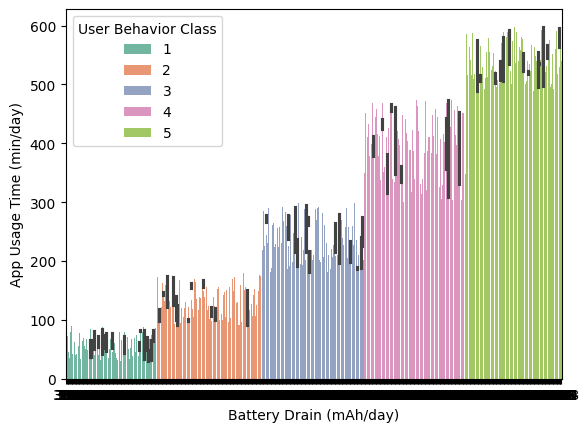

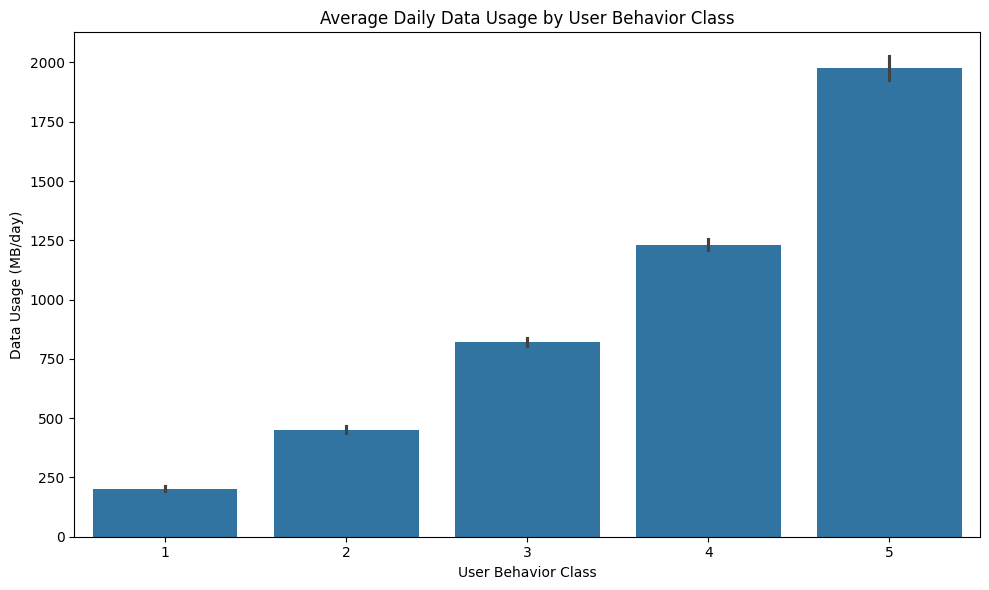

In [ ]:
sns.barplot(x='Battery Drain (mAh/day)', y='App Usage Time (min/day)', data=XDB, hue='User Behavior Class', palette='Set2')

plt.figure(figsize=(10, 6))
sns.barplot(x='User Behavior Class', y='Data Usage (MB/day)', data=XDB, estimator='mean')
plt.title('Average Daily Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()